In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import numpy as np

# Task 1 (a)
# Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Extract text and tags
X_train_text = train_df["Text"]
y_train = train_df["Category"]
X_test_text = test_df["Text"]
y_test = test_df["Category"]
# vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

In [4]:
X_train_text[0:5]

0    lifestyle governs mobile choice faster better ...
1    french honour director parker british film dir...
2    fockers fuel festive film chart comedy meet fo...
3    housewives lift channel 4 ratings debut us tel...
4    u2 desire number one u2 three prestigious gram...
Name: Text, dtype: object

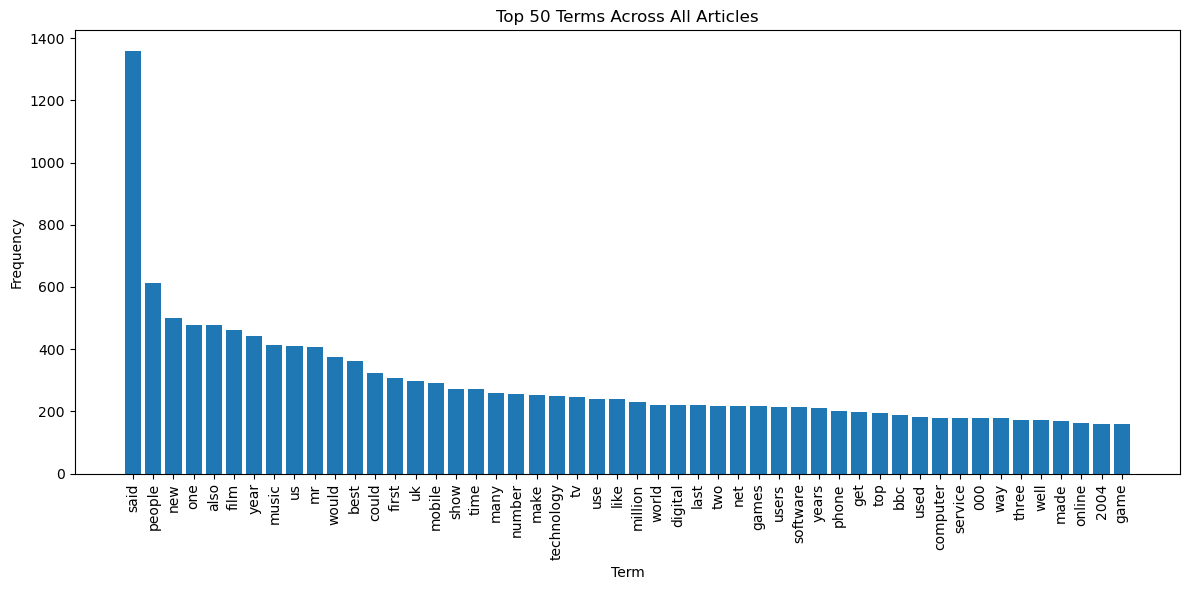

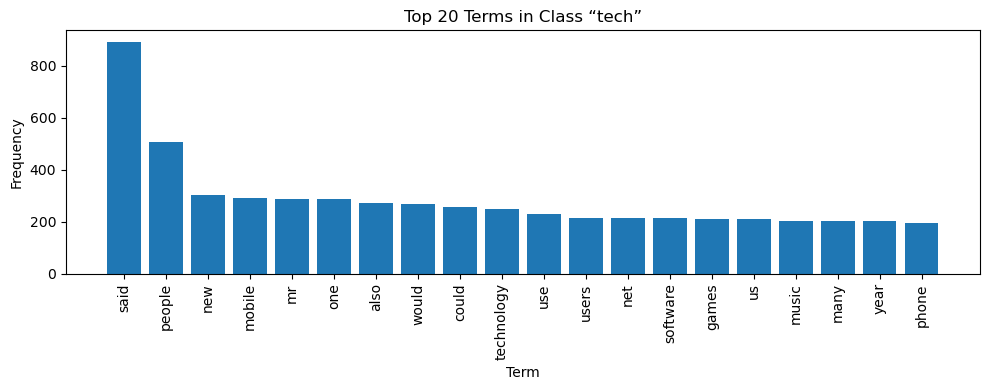

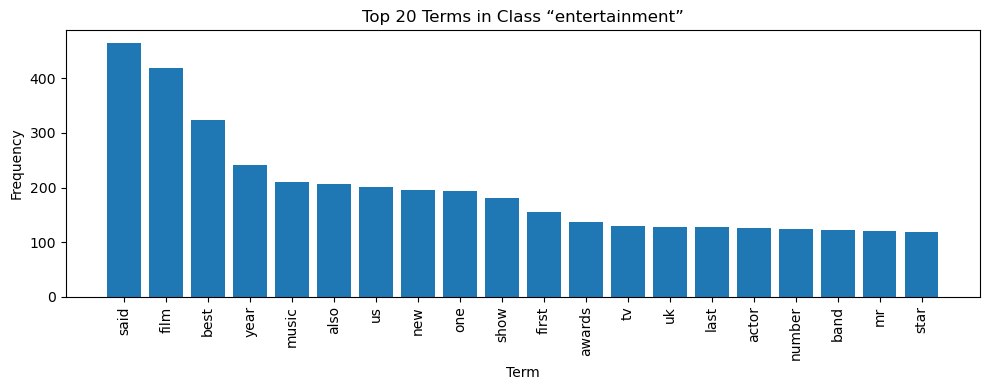

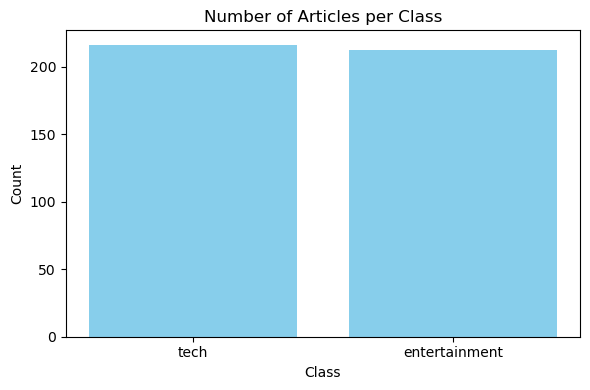

=== Dataset Summary ===
Total articles: 428
Articles per class:
  tech: 216
  entertainment: 212

=== Top 10 Terms Overall ===
said: 1357
people: 612
new: 500
one: 479
also: 479
film: 462
year: 442
music: 413
us: 411
mr: 408

=== Top 5 Terms by Class ===

Class 'tech' (total 216 articles):
  said: 892
  people: 507
  new: 304
  mobile: 290
  mr: 288

Class 'entertainment' (total 212 articles):
  said: 465
  film: 420
  best: 324
  year: 241
  music: 210


In [7]:
# Task 1 (b)
import csv
from collections import Counter
import matplotlib
# matplotlib.use('TkAgg')  # as there are some error happened when using matplotlib library
import matplotlib.pyplot as plt

# import data and prepare data
file_path = 'train.csv'

all_descriptions = []
all_classes = []
descriptions_by_class = {}

with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # skip header

    for row in reader:
        # news_id, description, classes
        news_id = row[0]
        body = row[1]
        cls = row[2]

        tokens = body.split()

        all_descriptions.append(tokens)
        all_classes.append(cls)

        if cls not in descriptions_by_class:
            descriptions_by_class[cls] = []
        descriptions_by_class[cls].append(tokens)

# overall frequency
flat_all_words = []
for tokens in all_descriptions:
    flat_all_words.extend(tokens)

counter_all = Counter(flat_all_words)

# get the top 50
top50_all = counter_all.most_common(50)
terms_all = [w for w, _ in top50_all]
freqs_all = [f for _, f in top50_all]

# draw top 50
plt.figure(figsize=(12, 6))
plt.bar(terms_all, freqs_all)
plt.xticks(rotation=90)
plt.title('Top 50 Terms Across All Articles')
plt.ylabel('Frequency')
plt.xlabel('Term')
plt.tight_layout()
plt.show()

# word frequency for each class and get top 20
for cls, list_of_token_lists in descriptions_by_class.items():
    flat_cls = []
    for tokens in list_of_token_lists:
        flat_cls.extend(tokens)

    counter_cls = Counter(flat_cls)
    top20_cls = counter_cls.most_common(20)
    terms20 = [w for w, _ in top20_cls]
    freqs20 = [f for _, f in top20_cls]

    plt.figure(figsize=(10, 4))
    plt.bar(terms20, freqs20)
    plt.xticks(rotation=90)
    plt.title(f'Top 20 Terms in Class “{cls}”')
    plt.ylabel('Frequency')
    plt.xlabel('Term')
    plt.tight_layout()
    plt.show()

# class distribution for the two classes
counter_classes = Counter(all_classes)
classes = list(counter_classes.keys())
counts = [counter_classes[c] for c in classes]

plt.figure(figsize=(6, 4))
plt.bar(classes, counts, color='skyblue')
plt.title('Number of Articles per Class')
plt.ylabel('Count')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

# info output (for review)
print("=== Dataset Summary ===")
print(f"Total articles: {len(all_descriptions)}")
print("Articles per class:")
for c, cnt in counter_classes.items():
    print(f"  {c}: {cnt}")

print("\n=== Top 10 Terms Overall ===")
for term, freq in top50_all[:10]:
    print(f"{term}: {freq}")

print("\n=== Top 5 Terms by Class ===")
for cls, list_of_token_lists in descriptions_by_class.items():
    freq_cls = Counter([w for tokens in list_of_token_lists for w in tokens])
    print(f"\nClass '{cls}' (total {counter_classes[cls]} articles):")
    for term, freq in freq_cls.most_common(5):
        print(f"  {term}: {freq}")

In [8]:
# Task 2 (a)
import pandas
import numpy
import sklearn
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from collections import defaultdict
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

#read datasets
dataset = pandas.read_csv("train.csv")

# print(dataset.shape)
# print(dataset.columns)
# print(type(dataset))
# print(type(dataset.iloc[:, 2]))
# dataset = dataset.drop(0) # remove first row (column labels)
desc = train_df["Text"]
label = train_df["Category"]



# print(label.head())
# print(label.dtype)

test_dataset = pandas.read_csv("test.csv")
#test_dataset = test_dataset.drop(0) # remove first row (column labels)
test_desc = test_df["Text"]
test_label = test_df["Category"]



#train-test split
desc_train, desc_test, label_train, label_test = train_test_split(desc, label, test_size = 0.2, random_state = 42)

In [11]:
#NB classifier

class q2aNB:
    def __init__(self, model=None, vectorizer=None):
        self.vectorizer = vectorizer if vectorizer else CountVectorizer()
        self.nbmodel = model if model else MultinomialNB()

    def train(self, descs, labels):
        desc_vec = self.vectorizer.fit_transform(descs)
        self.nbmodel.fit(desc_vec, labels)

    def test(self, descs, labels):
        desc_vec = self.vectorizer.transform(descs)
        pred_labels = self.nbmodel.predict(desc_vec)
        print(classification_report(labels, pred_labels))

    def predict(self, descs):
        desc_vec = self.vectorizer.transform(descs)
        return self.nbmodel.predict(desc_vec)

    def most_common_words(self, descs, labels, num_words = 20):
        class_descs = defaultdict(list)
        for desc, label in zip(descs, labels):
            class_descs[label].append(desc)

        result = {}
        for label, desc_list in class_descs.items():
            class_vec = self.vectorizer.transform(desc_list)
            word_counts = numpy.asarray(class_vec.sum(axis=0)).flatten()
            vocab = self.vectorizer.get_feature_names_out()
            word_freq = list(zip(vocab, word_counts))
            word_freq.sort(key=lambda x: x[1], reverse=True)
            result[label] = word_freq[:num_words]
        return result

    def most_likely_words(self, num_words = 20):
        vocab = self.vectorizer.get_feature_names_out()
        log_probs = self.nbmodel.feature_log_prob_
        classes = self.nbmodel.classes_
            
        results = {}
        for i, class_label in enumerate(classes):
            log_prob_class = log_probs[i]
            log_prob_others = numpy.mean(numpy.delete(log_probs, i, axis=0), axis=0)

            log_likelihood_ratios = log_prob_class - log_prob_others
            top_indices = numpy.argsort(log_likelihood_ratios)[::-1][:num_words]
            top_words = [(vocab[j], float(log_likelihood_ratios[j])) for j in top_indices]
            results[class_label] = top_words
        return results

In [13]:
#testing NB classifier
naivebayes = q2aNB()
naivebayes.train(desc, label)
naivebayes.test(test_desc, test_label)

               precision    recall  f1-score   support

entertainment       1.00      0.95      0.97        61
         tech       0.94      1.00      0.97        45

     accuracy                           0.97       106
    macro avg       0.97      0.98      0.97       106
 weighted avg       0.97      0.97      0.97       106



In [40]:
#20 most common words per label
common_words = naivebayes.most_common_words(test_desc, test_label)
for label, words in common_words.items():
    print(f"\nTop words for label '{label}':")
    for word, freq in words:
        print(f"{word}: {freq}")


Top words for label 'entertainment':
film: 163
said: 129
best: 106
year: 74
one: 72
also: 71
us: 63
festival: 48
two: 48
awards: 47
director: 47
music: 45
uk: 44
actor: 43
show: 42
star: 42
number: 41
band: 39
award: 38
new: 38

Top words for label 'tech':
said: 172
people: 140
also: 75
one: 65
mr: 61
tv: 60
technology: 56
digital: 55
would: 55
users: 54
video: 54
could: 53
like: 53
mobile: 53
music: 52
software: 52
year: 50
media: 45
new: 45
us: 43


In [15]:
#20 most likely words per label (using likelihood ratio)
most_likely = naivebayes.most_likely_words()

for label, words in most_likely.items():
    print(f"\nMost likely words for label '{label}':")
    for word, score in words:
        print(f"{word}: {score:.4f}")


Most likely words for label 'entertainment':
actress: 4.8231
singer: 4.8120
oscar: 4.7896
stars: 4.6430
aviator: 4.4554
band: 4.4394
nominated: 4.3196
festival: 4.2825
rock: 4.2825
album: 4.2142
nominations: 4.1834
charles: 4.1624
chart: 4.1189
foxx: 4.0964
oscars: 4.0734
starring: 4.0499
singles: 3.9498
jamie: 3.8676
swank: 3.8087
comedy: 3.7935

Most likely words for label 'tech':
users: 5.0584
software: 5.0537
microsoft: 4.7312
mobile: 4.6679
broadband: 4.5476
virus: 4.4999
firms: 4.4240
pc: 4.3791
spam: 4.1304
phones: 3.9714
gadget: 3.9644
net: 3.9598
consumer: 3.9219
mobiles: 3.9073
gadgets: 3.8925
windows: 3.8925
machines: 3.8925
technologies: 3.8622
systems: 3.8466
device: 3.8309


The words that maximize the likelihood ratio for each label appears to describe the two classes better, as the two lists contain distinct words, whereas the most common words lists not only share words between them, but contain general common words that aren't related to the topic, for example "said" is the top word for the entertainment label but also the 2nd most common word for the tech label.

In [20]:
# Task 3 (A)
# Train/Test splitting

print("--- Resetting 'desc' and 'label' variables to ensure data integrity ---")
desc = train_df["Text"]
label = train_df["Category"]
print(f"Data integrity check: len(desc) = {len(desc)}, len(label) = {len(label)}")

# Add a final check to report an error if the lengths don't match
if len(desc) != len(label):
    raise ValueError(
        f"FATAL ERROR: Mismatch between 'desc' ({len(desc)}) and 'label' ({len(label)}) lengths before starting the loop!"
    )
print("--------------------------------------------------------------------")


# Initialize a list to store scores
train_f1_list = []
test_f1_list = []

for i in range (10, 100, 20):
    m_val = i / 100
    print(f"---\nM Value: {m_val}")

    # Divide the training set and the test set (validation set) of this cycle according to the ratio m_val
    split_val = int(len(desc) * m_val)
    split_desc = desc[:split_val]
    split_label = label[:split_val]
    stest_desc = desc[split_val:]
    stest_label = label[split_val:]

    # If the training set is empty after splitting, skip
    if len(split_desc) == 0:
        print(f"Skipping m={m_val} because split gives empty training set.")
        continue

    # Make sure labels is a 1D array
    split_label = np.array(split_label).ravel()
    stest_label = np.array(stest_label).ravel()

    # Initialize and train the model
    splitNB = q2aNB()
    splitNB.train(split_desc, split_label)

    f1train = splitNB.predict(split_desc)
    train_precision = precision_score(split_label, f1train, average='weighted', zero_division=0)
    train_recall = recall_score(split_label, f1train, average='weighted', zero_division=0)
    
    if (train_precision + train_recall) == 0:
        train_f1 = 0.0
    else:
        train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall)
        
    train_f1_list.append(train_f1)
    print(f"Training F1 score: {train_f1:.4f}")

    # --- Test set F1 score calculation ---
    f1test = splitNB.predict(stest_desc)
    precision = precision_score(stest_label, f1test, average='weighted', zero_division=0)
    recall = recall_score(stest_label, f1test, average='weighted', zero_division=0)

    if (precision + recall) == 0:
        f1 = 0.0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
        
    print(f"Testing F1 score: {f1:.4f}")
    test_f1_list.append(f1)

--- Resetting 'desc' and 'label' variables to ensure data integrity ---
Data integrity check: len(desc) = 428, len(label) = 428
--------------------------------------------------------------------
---
M Value: 0.1
Training F1 score: 1.0000
Testing F1 score: 0.9483
---
M Value: 0.3
Training F1 score: 1.0000
Testing F1 score: 0.9804
---
M Value: 0.5
Training F1 score: 0.9953
Testing F1 score: 0.9860
---
M Value: 0.7
Training F1 score: 0.9967
Testing F1 score: 0.9847
---
M Value: 0.9
Training F1 score: 0.9948
Testing F1 score: 1.0000


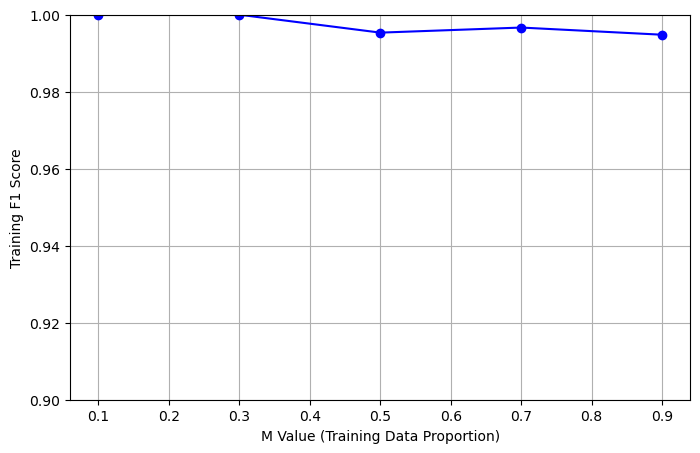

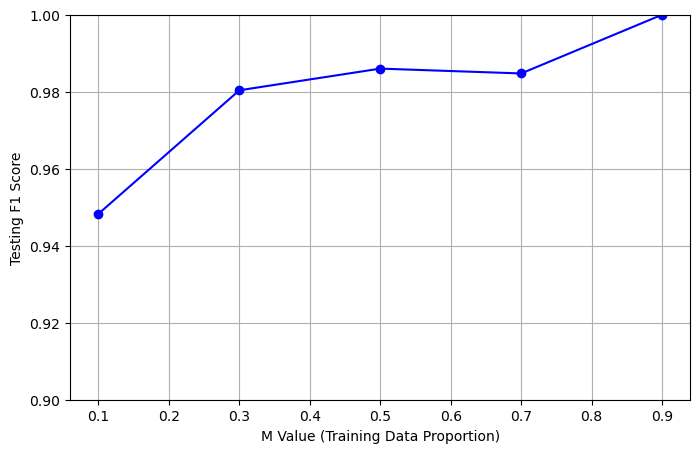

In [23]:
# F1 Score Graphs

m_val_list = [0.1,0.3,0.5,0.7,0.9]

plt.figure(figsize=(8, 5))
plt.plot(m_val_list, train_f1_list, marker='o', linestyle='-', color='blue')
plt.xlabel("M Value (Training Data Proportion)")
plt.ylabel("Training F1 Score")
plt.grid(True)
plt.ylim(0.9, 1)
plt.show()
plt.figure(figsize=(8, 5))
plt.plot(m_val_list, test_f1_list, marker='o', linestyle='-', color='blue')
plt.xlabel("M Value (Training Data Proportion)")
plt.ylabel("Testing F1 Score")
plt.grid(True)
plt.ylim(0.9, 1)
plt.show()

In [25]:
# Cross Validation
pipe = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

param_grid = {
    'vectorizer__max_features': [50, 100, 250, 500, 750, 1000], #max features
    'vectorizer__min_df': [1, 2, 5, 10, 15], #filter out rare words
    'vectorizer__max_df': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], #filter out common words
    'nb__alpha': [0.1, 0.25, 0.5, 0.75, 1.0] #smoothing
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_weighted')
grid.fit(desc, label)

print("Best parameters:", grid.best_params_)

Best parameters: {'nb__alpha': 0.1, 'vectorizer__max_df': 0.5, 'vectorizer__max_features': 500, 'vectorizer__min_df': 10}


C:\Users\tang\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [26]:
#show how hyperparameters affect the score
results_df = pandas.DataFrame(grid.cv_results_)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

print("---")
print("Effect of alpha (smoothing)")
alpha_effect = results_df.groupby('param_nb__alpha')['mean_test_score'].mean()
print(alpha_effect)

print("---")
print("Effect of max features")
max_f_effect = results_df.groupby('param_vectorizer__max_features')['mean_test_score'].mean()
print(max_f_effect)

print("---")
print("Effect of filtering rare words")
min_df_effect = results_df.groupby('param_vectorizer__min_df')['mean_test_score'].mean()
print(min_df_effect)

print("---")
print("Effect of filtering common words")
max_df_effect = results_df.groupby('param_vectorizer__max_df')['mean_test_score'].mean()

---
Effect of alpha (smoothing)
param_nb__alpha
0.10    0.969297
0.25    0.970020
0.50    0.970110
0.75    0.970251
1.00    0.970419
Name: mean_test_score, dtype: float64
---
Effect of max features
param_vectorizer__max_features
50      0.932061
100     0.966163
250     0.973886
500     0.981715
750     0.983399
1000    0.982893
Name: mean_test_score, dtype: float64
---
Effect of filtering rare words
param_vectorizer__min_df
1     0.970252
2     0.970098
5     0.969942
10    0.969708
15    0.970097
Name: mean_test_score, dtype: float64
---
Effect of filtering common words


In [27]:
#Testing NB with best parameters

finalmodel = MultinomialNB(alpha=0.25)
finalvec = CountVectorizer(max_df=0.8, min_df=1, max_features=750)
finalNB = q2aNB(model=finalmodel, vectorizer=finalvec)
naivebayes.train(desc, label)
naivebayes.test(test_desc, test_label)

               precision    recall  f1-score   support

entertainment       1.00      0.95      0.97        61
         tech       0.94      1.00      0.97        45

     accuracy                           0.97       106
    macro avg       0.97      0.98      0.97       106
 weighted avg       0.97      0.97      0.97       106



In [28]:
# Task 2 (b)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Define the KNN model
knn_model = KNeighborsClassifier()

# Step 2: Define the hyperparameter search space
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Step 3: Configure GridSearchCV
knn_grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=knn_param_grid,
    scoring='f1_weighted',  # Use weighted F1 as evaluation metric
    cv=5,                   # 5-fold cross-validation
    n_jobs=-1,              # Use all CPU cores
    verbose=1               # Print progress
)

# Step 4: Fit the model on training data
knn_grid_search.fit(X_train, y_train)

# Step 5: View all parameter combinations and their mean F1 scores
knn_cv_results = pd.DataFrame(knn_grid_search.cv_results_)
print(knn_cv_results[['params', 'mean_test_score']])

# Step 6: Print the best parameter set and the corresponding cross-validation score
print("Best parameter combination:", knn_grid_search.best_params_)
print("Best weighted F1 score on training (CV): {:.4f}".format(knn_grid_search.best_score_))

# Step 7: Make predictions on the test set using the best model
knn_best_model = knn_grid_search.best_estimator_
knn_predictions = knn_best_model.predict(X_test)

# Step 8: Evaluate the test results
test_accuracy = accuracy_score(y_test, knn_predictions)
test_f1 = f1_score(y_test, knn_predictions, average='weighted')

print("\nTest Accuracy: {:.4f}".format(test_accuracy))
print("Test Weighted F1 Score: {:.4f}".format(test_f1))
print("\nClassification Report:")
print(classification_report(y_test, knn_predictions, zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
                                               params  mean_test_score
0   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.957989
1   {'metric': 'euclidean', 'n_neighbors': 3, 'wei...         0.957989
2   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.972004
3   {'metric': 'euclidean', 'n_neighbors': 5, 'wei...         0.972004
4   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.969684
5   {'metric': 'euclidean', 'n_neighbors': 7, 'wei...         0.969684
6   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.971999
7   {'metric': 'euclidean', 'n_neighbors': 9, 'wei...         0.971999
8   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...              NaN
9   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...         0.474007
10  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...              NaN
11  {'metric': 'manhattan', 'n_neighbors': 5, 'wei...         0.537747
12  {'metric': '

C:\Users\tang\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [0.95798937 0.95798937 0.97200418 0.97200418 0.96968394 0.96968394
 0.97199911 0.97199911        nan 0.47400723        nan 0.5377469
        nan 0.59667923        nan 0.5778633 ]
  warnings.warn(


In [29]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Use the best model to predict the test set
knn_final_model = knn_grid_search.best_estimator_
test_predictions = knn_final_model.predict(X_test)

# Evaluate the model
test_acc = accuracy_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions, average='weighted')
test_report = classification_report(y_test, test_predictions, zero_division=0)
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Print evaluation results
print(f"Test Set Accuracy: {test_acc:.4f}, Weighted F1 Score: {test_f1_score:.4f}")
print("\nDetailed Classification Report:")
print(test_report)
print("Confusion Matrix:")
print(test_conf_matrix)

Test Set Accuracy: 0.9811, Weighted F1 Score: 0.9811

Detailed Classification Report:
               precision    recall  f1-score   support

entertainment       0.98      0.98      0.98        61
         tech       0.98      0.98      0.98        45

     accuracy                           0.98       106
    macro avg       0.98      0.98      0.98       106
 weighted avg       0.98      0.98      0.98       106

Confusion Matrix:
[[60  1]
 [ 1 44]]


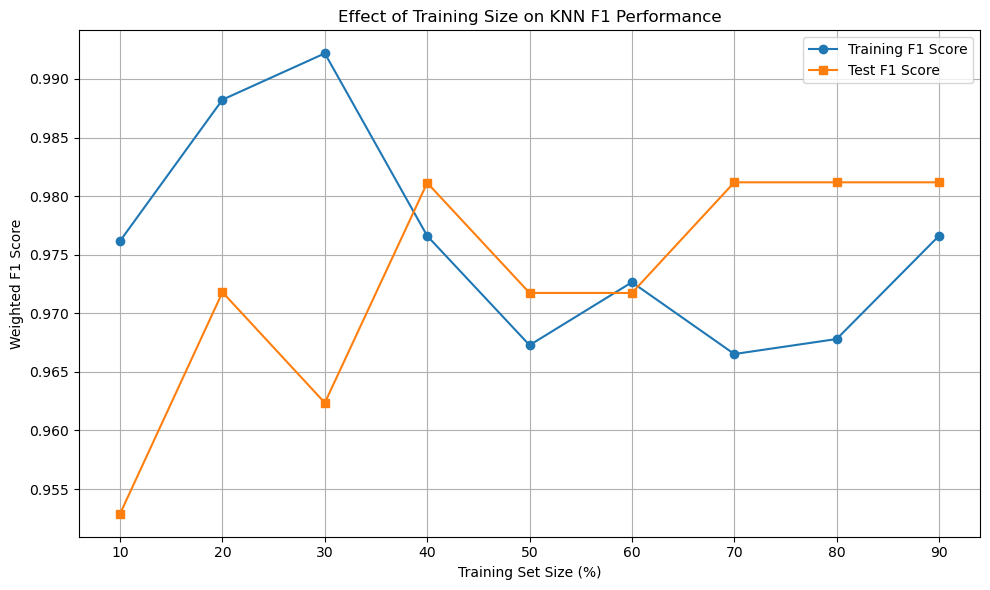

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

# Define the training size proportions to evaluate
train_percentages = np.linspace(0.1, 0.9, 9)
f1_scores_train = []
f1_scores_test = []

# Pre-fit the vectorizer on the full training set
vectorizer.fit(X_train_text)
X_test_vectorized = vectorizer.transform(X_test_text)

# Loop through each training size
for percentage in train_percentages:
    # Sample the training data
    X_partial_text, _, y_partial, _ = train_test_split(
        X_train_text, y_train, train_size=percentage, stratify=y_train, random_state=30
    )

    # Vectorize the sampled training data
    X_partial_vectorized = vectorizer.transform(X_partial_text)

    # Train KNN model using best parameters
    knn_model = KNeighborsClassifier(**knn_grid_search.best_params_)
    knn_model.fit(X_partial_vectorized, y_partial)

    # Predict on both partial training set and full test set
    y_pred_partial = knn_model.predict(X_partial_vectorized)
    y_pred_test = knn_model.predict(X_test_vectorized)

    # Calculate F1 scores
    f1_train = f1_score(y_partial, y_pred_partial, average='weighted')
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_percentages * 100, f1_scores_train, marker='o', label='Training F1 Score')
plt.plot(train_percentages * 100, f1_scores_test, marker='s', label='Test F1 Score')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Weighted F1 Score')
plt.title('Effect of Training Size on KNN F1 Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

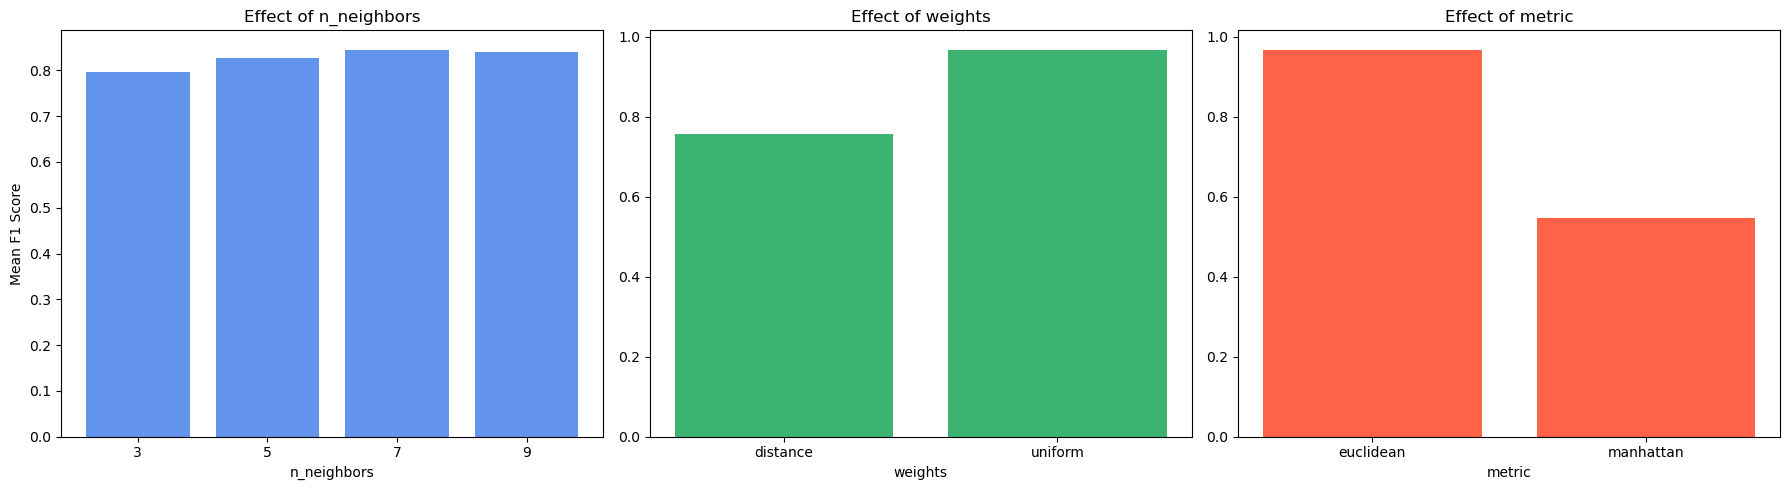

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Load CV results from GridSearchCV
search_results = pd.DataFrame(knn_grid_search.cv_results_)

# Keep only relevant columns
summary_df = search_results[[
    'param_n_neighbors', 'param_weights', 'param_metric', 'mean_test_score'
]]

# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ----------- Plot 1: n_neighbors vs. F1 score -----------
avg_f1_by_k = summary_df.groupby('param_n_neighbors')['mean_test_score'].mean()
axes[0].bar(avg_f1_by_k.index.astype(str), avg_f1_by_k.values, color='cornflowerblue')
axes[0].set_title('Effect of n_neighbors')
axes[0].set_xlabel('n_neighbors')
axes[0].set_ylabel('Mean F1 Score')

# ----------- Plot 2: weights vs. F1 score -----------
avg_f1_by_weight = summary_df.groupby('param_weights')['mean_test_score'].mean()
axes[1].bar(avg_f1_by_weight.index.astype(str), avg_f1_by_weight.values, color='mediumseagreen')
axes[1].set_title('Effect of weights')
axes[1].set_xlabel('weights')

# ----------- Plot 3: metric vs. F1 score -----------
avg_f1_by_metric = summary_df.groupby('param_metric')['mean_test_score'].mean()
axes[2].bar(avg_f1_by_metric.index.astype(str), avg_f1_by_metric.values, color='tomato')
axes[2].set_title('Effect of metric')
axes[2].set_xlabel('metric')

# Layout adjustment
plt.tight_layout()
plt.show()

In [32]:
# Task 2 (C)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [33]:
# 1. Load the data
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

# 2. Labels: 1 if 'tech', else 0
y_train = (trainData["Category"] == "tech").astype(int).tolist()
y_test = (testData["Category"] == "tech").astype(int).tolist()

# 3. TF-IDF Vectorization
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(trainData["Text"])
x_test = vectorizer.transform(testData["Text"])

# 4. PCA to reduce to 2D for plotting
pca = PCA(n_components=2)
x_train_2d = pca.fit_transform(x_train.toarray()) 
x_test_2d = pca.transform(x_test.toarray())

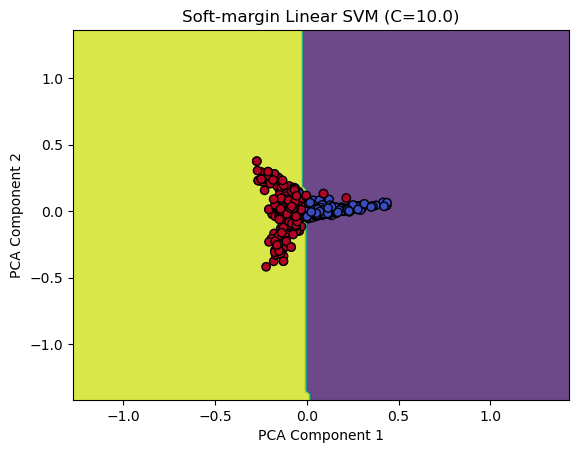

The soft-margin linear SVM with C=10.0, Accuracy = 0.9811


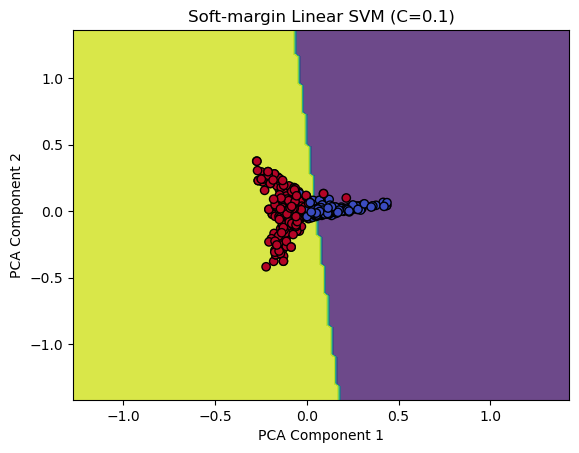

The soft-margin linear SVM with C=0.1, Accuracy = 0.8585


In [34]:
# Soft-margin Linear SVM
for C_soft in [10.0,0.1]: # check how the value of C effect
    linear_svm = svm.SVC(kernel='linear', C=C_soft)
    linear_svm.fit(x_train_2d, y_train)
    y_pred = linear_svm.predict(x_test_2d)

    # Plotting decision surface
    h = .02  # step size in the mesh
    x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
    y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c =y_train, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(f'Soft-margin Linear SVM (C={C_soft})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()
    
    print(f"The soft-margin linear SVM with C={C_soft}, Accuracy = {accuracy_score(y_test, y_pred):.4f}")

In linear SVM, C controls the degree of penalty for misclassification. The smaller C is, the more misclassifications are allowed, and the larger C is, the more the model will focus on the few serious misclassifications. When C is the smallest (C=0.1), the accuracy is the lowest (0.8585), and when C is the largest (C=10), the accuracy is the highest (0.9811).

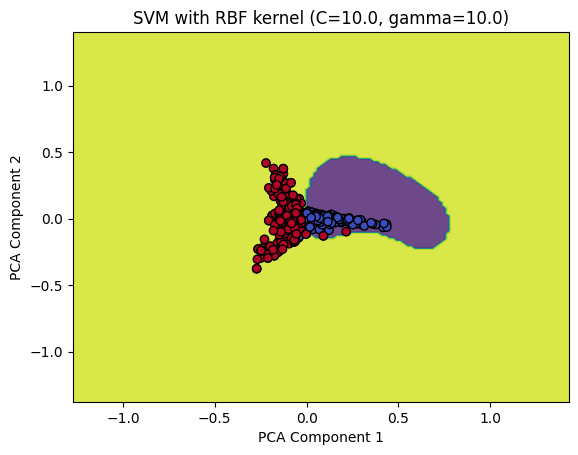

C=10.0, gamma = 10.00
Accuracy: 0.9811
----------------------------------------


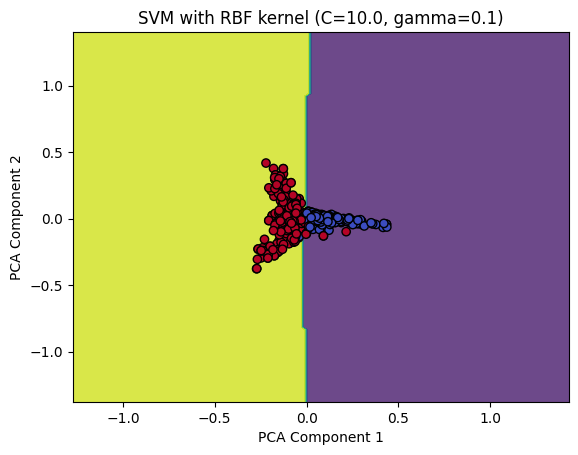

C=10.0, gamma = 0.10
Accuracy: 0.9811
----------------------------------------


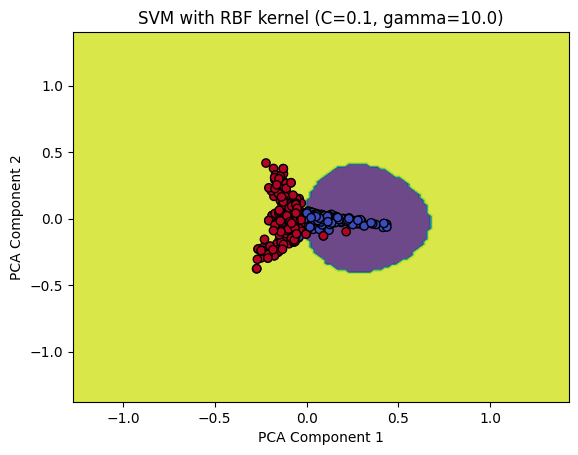

C=0.1, gamma = 10.00
Accuracy: 0.9811
----------------------------------------


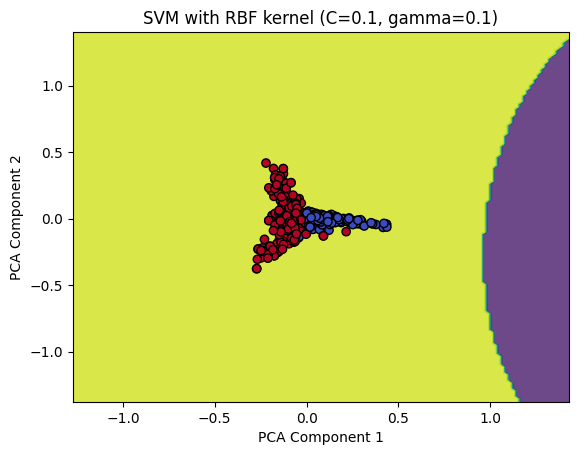

C=0.1, gamma = 0.10
Accuracy: 0.4245
----------------------------------------


In [6]:
# Hard-margin RBF Kernel SVM


for C_hard in [10.0,0.1]:# check how the value of C effect
    for gamma in [10.0,0.1]: # check 
        rbf_svm = svm.SVC(kernel='rbf', C=C_hard, gamma=gamma)
        rbf_svm.fit(x_train_2d, y_train)
        y_pred = rbf_svm.predict(x_test_2d)
    
        # Plotting decision surface
        h = .02  # step size in the mesh
        x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
        y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c = y_train, edgecolors='k', cmap=plt.cm.coolwarm)
        plt.title(f"SVM with RBF kernel (C={C_hard}, gamma={gamma})")
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.show()
    
        print(f"C={C_hard}, gamma = {gamma:.2f}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("-"*40)

In RBF SVM, in addition to the same hyperparameter C as linear SVM, there is also a hyperparameter gamma, which controls the width of the kernel function and affects the adaptability of the model to the training set: when gamma is the largest (10.0), the accuracy is the highest (0.9811) regardless of the size of C. When gamma is the smallest (0.1), if C is also the smallest (0.1), the accuracy is the lowest (0.4245).

In [7]:
# Train/Test for F1
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

m_values = [0.1, 0.3, 0.5, 0.7,0.9]

train_results = {
    "Linear SVM": [],
    "RBF SVM": []
}
test_results = {
    "Linear SVM": [],
    "RBF SVM": []
}

for m in m_values:
    size = int(m * x_train_2d.shape[0])
    x_m = x_train_2d[:size]
    y_m = y_train[:size]

    # Fresh model for each iteration
    linear_svm = SVC(kernel="linear", C=1.0)
    rbf_svm = SVC(kernel="rbf", C=1.0, gamma=1.0)

    # Linear SVM
    linear_svm.fit(x_m, y_m)
    y_train_pred_linear = linear_svm.predict(x_m)
    y_test_pred_linear = linear_svm.predict(x_test_2d)
    
    train_results["Linear SVM"].append(f1_score(y_m, y_train_pred_linear, pos_label=1))
    test_results["Linear SVM"].append(f1_score(y_test, y_test_pred_linear, pos_label=1))
    
    # RBF SVM
    rbf_svm.fit(x_m, y_m)
    y_train_pred_rbf = rbf_svm.predict(x_m)
    y_test_pred_rbf = rbf_svm.predict(x_test_2d)
    
    train_results["RBF SVM"].append(f1_score(y_m, y_train_pred_rbf, pos_label=1))
    test_results["RBF SVM"].append(f1_score(y_test, y_test_pred_rbf, pos_label=1))

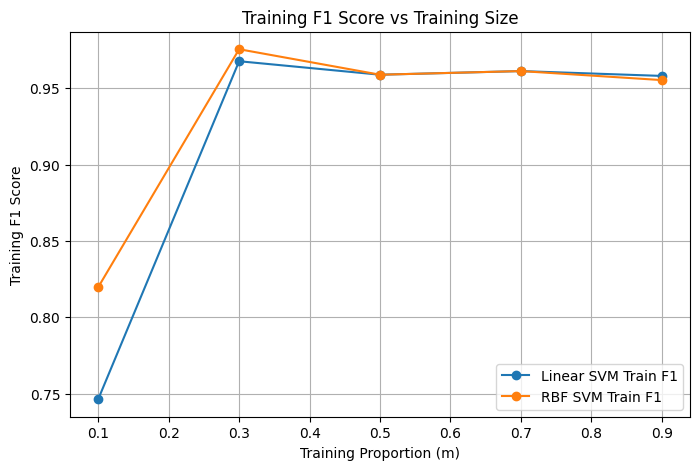

In [8]:
# Plot Training F1
plt.figure(figsize=(8, 5))
for model_name in train_results:
    plt.plot(m_values, train_results[model_name], label=f'{model_name} Train F1', marker='o')
plt.xlabel("Training Proportion (m)")
plt.ylabel("Training F1 Score")
plt.title("Training F1 Score vs Training Size")
plt.legend()
plt.grid(True)
plt.show()

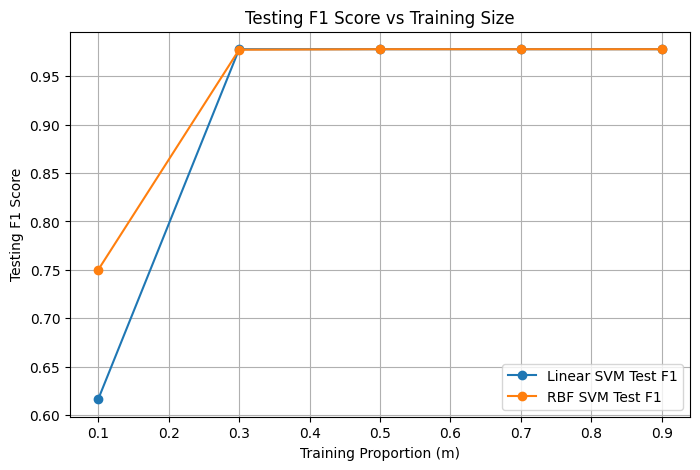

In [9]:
# Plot Testing F1
plt.figure(figsize=(8, 5))
for model_name in test_results:
    plt.plot(m_values, test_results[model_name], label=f'{model_name} Test F1', marker='o')
plt.xlabel("Training Proportion (m)")
plt.ylabel("Testing F1 Score")
plt.title("Testing F1 Score vs Training Size")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# 5-fold cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Linear SVM
param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100]}
linear_svm = SVC(kernel='linear')

grid_linear = GridSearchCV(linear_svm, param_grid_linear, cv=5, scoring='f1')
grid_linear.fit(x_train_2d, y_train)

print("Best Linear SVM Params:", grid_linear.best_params_)

# RBF SVM
param_grid_rbf = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100]
}
rbf_svm = SVC(kernel='rbf')

grid_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=5, scoring='f1')
grid_rbf.fit(x_train_2d, y_train)

print("Best RBF SVM Params:", grid_rbf.best_params_)

Best Linear SVM Params: {'C': 1}
Best RBF SVM Params: {'C': 0.1, 'gamma': 10}


Hidden units size: 5, for the test loss on 20th is 0.0175
Hidden units size: 20, for the test loss on 20th is 0.0184
Hidden units size: 40, for the test loss on 20th is 0.0178


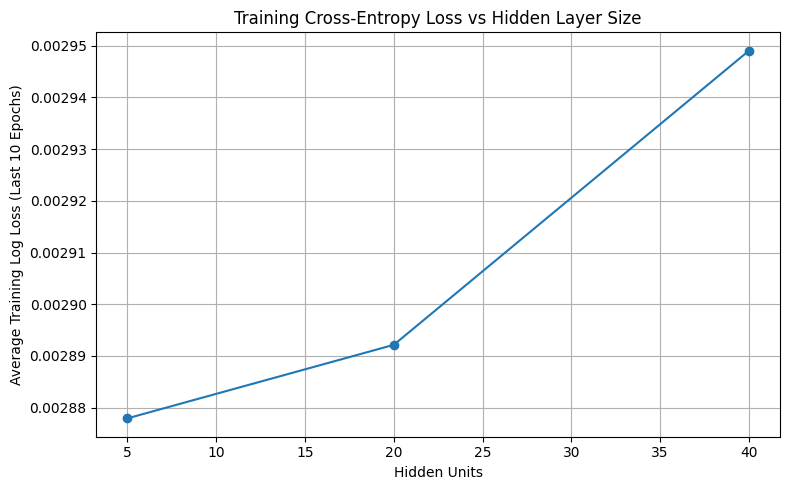

In [11]:
# Task 2 (D)
import numpy as np
import pandas as pd
import matplotlib
# matplotlib.use('TkAgg')  # as there are some error happened when using matplotlib library
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Load the data and prepare the data
df_train = pd.read_csv("train.csv")
x_train = df_train["Text"]
y_train = df_train["Category"]

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# Neural Network setup and epoch for 100 times.
hidden_units_list = [5, 20, 40]
final_losses = []
for units in hidden_units_list:
    model = MLPClassifier(
        hidden_layer_sizes=(units,),
        activation="relu",
        solver="sgd",
        learning_rate_init=0.01,
        random_state=42,
        warm_start=True,
    )

    losses = []
    # initialise the model
    model.partial_fit(X_train[:2], y_train_enc[:2], classes=[0, 1])

    for epoch in range(100):
        model.partial_fit(X_train, y_train_enc, classes=[0, 1])
        y_pred_proba = model.predict_proba(X_train)
        loss = log_loss(y_train_enc, y_pred_proba)
        losses.append(loss)

        # Average over last 10 epochs (91-100)
    avg_loss_last_10 = sum(losses[-10:]) / 10
    final_losses.append(avg_loss_last_10)
    print(f"Hidden units size: {units}, for the test loss on 20th is {losses[20]:.4f}")

# draw the graph
plt.figure(figsize=(8,5))
plt.plot(hidden_units_list, final_losses, marker="o")
plt.xlabel("Hidden Units")
plt.ylabel("Average Training Log Loss (Last 10 Epochs)")
plt.title("Training Cross-Entropy Loss vs Hidden Layer Size")
plt.grid(True)
plt.tight_layout()
plt.show()

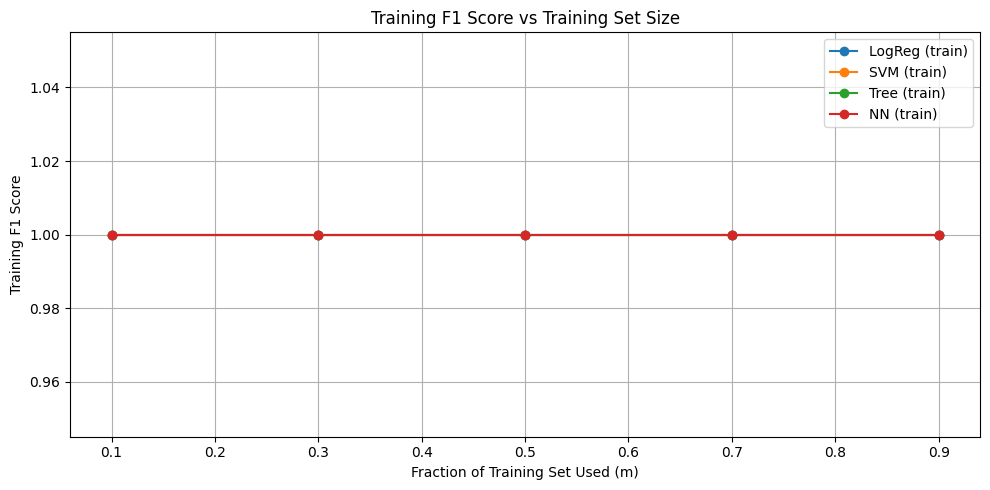

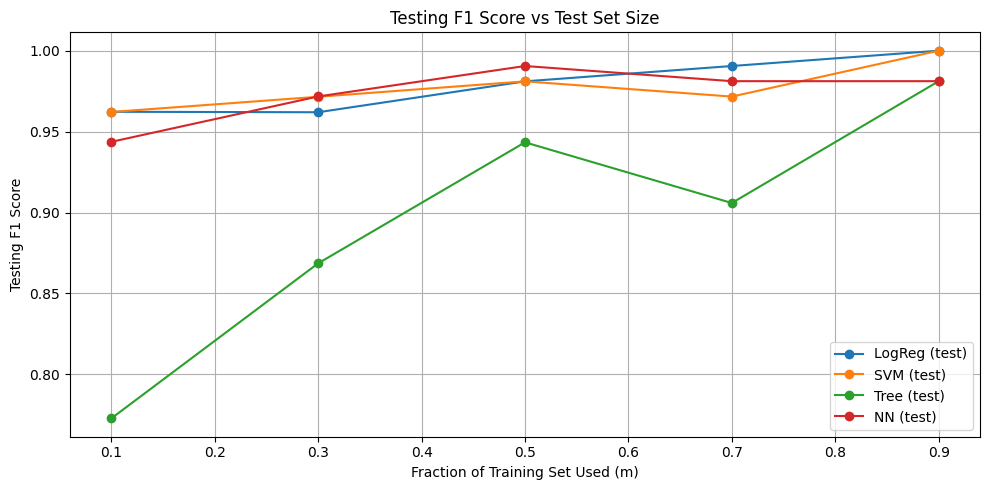

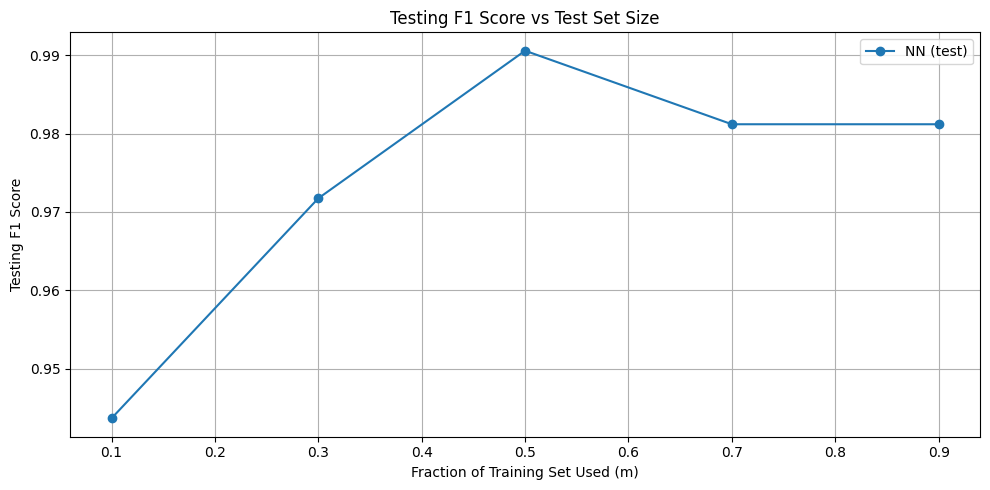

Mean F1 (SVM, rbf, C=1): 0.957998482060896


In [21]:
import pandas as pd
import matplotlib
# matplotlib.use('TkAgg')  # as there are some error happened when using matplotlib library
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

x_train_text = df_train["Text"]
y_train_raw = df_train["Category"]
x_test_text = df_test["Text"]
y_test_raw = df_test["Category"]

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train_text)
X_test = vectorizer.transform(x_test_text)

le = LabelEncoder()
y_train = le.fit_transform(y_train_raw)
y_test = le.transform(y_test_raw)

# this part is the part contains all 4 modules.
hidden_units_list = [5, 20, 40]
binned_loss_curves = {}

m_values = [0.1, 0.3, 0.5, 0.7, 0.9]
classifiers = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="linear"),
    "Tree": DecisionTreeClassifier(),
    "NN": MLPClassifier(hidden_layer_sizes=(20,), max_iter=100, random_state=42),
}

train_f1 = {name: [] for name in classifiers}
test_f1 = {name: [] for name in classifiers}

N = X_train.shape[0]

for m in m_values:
    mN = int(m * N)
    X_sub = X_train[:mN]
    y_sub = y_train[:mN]
    for name, clf in classifiers.items():
        clf.fit(X_sub, y_sub)
        y_train_pred = clf.predict(X_sub)
        y_test_pred = clf.predict(X_test)
        train_f1[name].append(f1_score(y_sub, y_train_pred, average="weighted"))
        test_f1[name].append(f1_score(y_test, y_test_pred, average="weighted"))

# Plotting
plt.figure(figsize=(10,5))
for name in classifiers:
    plt.plot(m_values, train_f1[name], marker="o", label=f"{name} (train)")
plt.xlabel("Fraction of Training Set Used (m)")
plt.ylabel("Training F1 Score")
plt.title("Training F1 Score vs Training Set Size")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
for name in classifiers:
    # if name == "NN":    #adding this can just show NN Fi test score.
        plt.plot(m_values, test_f1[name], marker="o", label=f"{name} (test)")
plt.xlabel("Fraction of Training Set Used (m)")
plt.ylabel("Testing F1 Score")
plt.title("Testing F1 Score vs Test Set Size")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
for name in classifiers:
    if name == "NN":    #adding this can just show NN Fi test score.
        plt.plot(m_values, test_f1[name], marker="o", label=f"{name} (test)")
plt.xlabel("Fraction of Training Set Used (m)")
plt.ylabel("Testing F1 Score")
plt.title("Testing F1 Score vs Test Set Size")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# for the 5-fold cross-validation

clf = SVC(kernel='rbf', C=1)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_weighted')
print("Mean F1 (SVM, rbf, C=1):", cv_scores.mean())